In [34]:
from binance.spot import Spot
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# init
api_key = 'API KEY'
api_secret = 'API SECRET'

In [3]:
client = Spot(api_key, api_secret)


In [4]:
# get historic data
def get_historic_data(symbol, interval, start_time, end_time):
    data = client.klines(symbol=symbol, interval=interval, startTime=start_time, endTime=end_time)
    df = pd.DataFrame(data)
    df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    df = df[['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time']]
    df['open_time_ms'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time_ms'] = pd.to_datetime(df['close_time'], unit='ms')
    return df

In [67]:
def collect_data(coins, idx):
    
    interval = '5m'

    coin = coins[idx]
    print(coin)
    start_time = '2022-01-01'
    start_time = int(pd.to_datetime(start_time).timestamp() * 1000)
    end_time = start_time + 300000 * 500
    df = get_historic_data(f'{coin}USDT', interval, start_time, end_time)
    df_master = df.copy()
    for i in tqdm(range(255)):
        try:
            start_time = df_master['open_time'].iloc[-1] + 300000
            end_time = start_time + 300000 * 500
            df = get_historic_data(f'{coin}USDT', interval, start_time, end_time)
            df_master = pd.concat([df_master, df])
            # print(i, end="\n" if i%10==9 else ",", flush=True)
        except:
            df_master.to_csv(f'{coin}USDT_2022_5m.csv', index=False)
            break
    return df_master
    

In [78]:
coins = ['ADA','ATOM','AVAX','BNB','BTC','DOGE','DOT','ETH','LINK','LTC','MATIC','SHIB','SOL','TRX','UNI','XRP']
close = []
# i = 2

for i in range(2, len(coins)):
    coin1 = collect_data(coins, i)
    coin1.to_csv(f'data/{coins[i]}USDT_2022_5m.csv', index=False)
    close.append(coin1['close'].to_numpy().astype(float))
    print('End time: '+ str(coin1['open_time_ms'].to_list()[-1]))

AVAX


100%|██████████| 255/255 [01:41<00:00,  2.51it/s]


End time: 2023-03-21 10:35:00
BNB


100%|██████████| 255/255 [01:37<00:00,  2.62it/s]


End time: 2023-03-21 10:35:00
BTC


100%|██████████| 255/255 [01:38<00:00,  2.59it/s]


End time: 2023-03-21 10:35:00
DOGE


100%|██████████| 255/255 [01:38<00:00,  2.59it/s]


End time: 2023-03-21 10:35:00
DOT


100%|██████████| 255/255 [01:41<00:00,  2.51it/s]


End time: 2023-03-21 10:35:00
ETH


100%|██████████| 255/255 [01:36<00:00,  2.63it/s]


End time: 2023-03-21 10:35:00
LINK


100%|██████████| 255/255 [01:39<00:00,  2.56it/s]


End time: 2023-03-21 10:35:00
LTC


100%|██████████| 255/255 [01:38<00:00,  2.59it/s]


End time: 2023-03-21 10:35:00
MATIC


100%|██████████| 255/255 [01:34<00:00,  2.70it/s]


End time: 2023-03-21 10:35:00
SHIB


100%|██████████| 255/255 [01:37<00:00,  2.62it/s]


End time: 2023-03-21 10:35:00
SOL


100%|██████████| 255/255 [01:38<00:00,  2.60it/s]


End time: 2023-03-21 10:35:00
TRX


100%|██████████| 255/255 [01:38<00:00,  2.59it/s]


End time: 2023-03-21 10:35:00
UNI


100%|██████████| 255/255 [01:38<00:00,  2.58it/s]


End time: 2023-03-21 10:35:00
XRP


100%|██████████| 255/255 [01:34<00:00,  2.71it/s]


End time: 2023-03-21 10:35:00


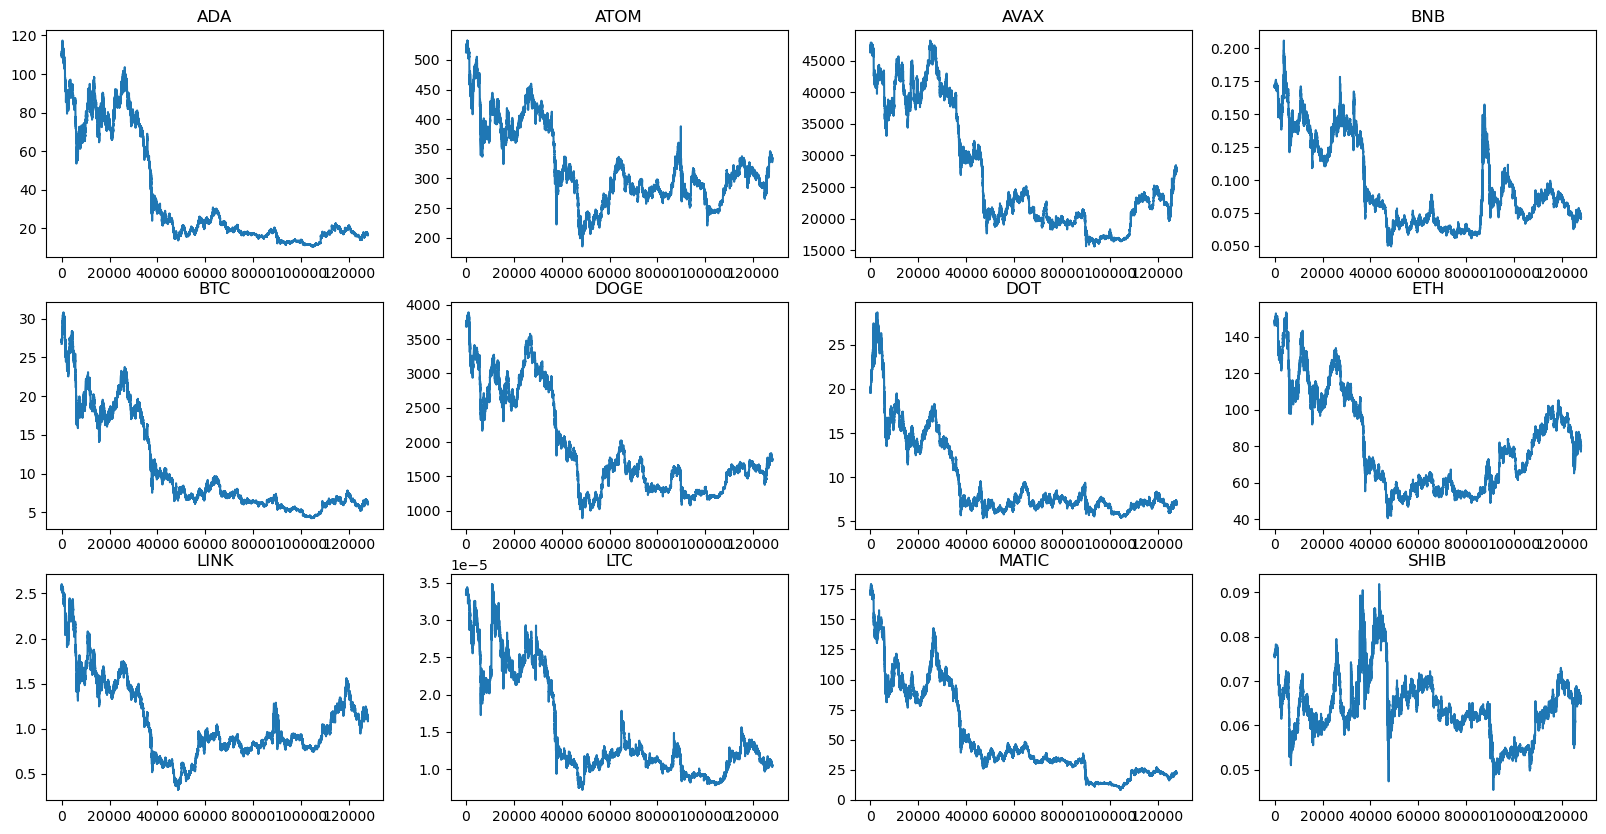

In [81]:
fig, ax = plt.subplots(3,4,figsize=(20,10))

for i in range(3):
    for j in range(4):
        ax[i,j].plot(close[i*4+j])
        ax[i,j].set_title(coins[i*4+j])